<a href="https://colab.research.google.com/github/WesleySouza13/Projeto-Pre-o-a-oes-Vale/blob/main/SERIES_TEMPORAIS_LSTM_PRECO_A%C3%87OES_VALE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
import torch
from torch import nn, optim

In [ ]:
torch.manual_seed(123)

In [ ]:
import yfinance as yf

In [ ]:
df = yf.download('VALE', start='2022-01-10', end='2024-09-30')
df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,VALE,VALE,VALE,VALE,VALE,VALE
Date,,,,,,
2022-01-10 00:00:00+00:00,11.789010,14.65,14.88,14.53,14.85,27748400
2022-01-11 00:00:00+00:00,12.263790,15.24,15.25,14.83,14.88,31868700
2022-01-12 00:00:00+00:00,12.513250,15.55,15.60,15.32,15.50,31876700
2022-01-13 00:00:00+00:00,12.312073,15.30,15.54,15.21,15.36,32193900
2022-01-14 00:00:00+00:00,12.376449,15.38,15.44,15.03,15.06,25261600
...,...,...,...,...,...,...
2024-09-23 00:00:00+00:00,10.400000,10.40,10.44,10.17,10.23,30930500
2024-09-24 00:00:00+00:00,11.070000,11.07,11.13,10.97,10.98,50871000


In [ ]:
#analise basica só para entendermos os dados
#não desenvolverei muito, so criarei descriçoes sobre o que estamos falando.
df['Adj Close'].mean()



,0
Ticker,
VALE,12.525469


In [ ]:
df.isnull().sum()
df = df.dropna()

In [ ]:
df.isnull().sum()

,,0
Price,Ticker,
Adj Close,VALE,0
Close,VALE,0
High,VALE,0
Low,VALE,0
Open,VALE,0
Volume,VALE,0


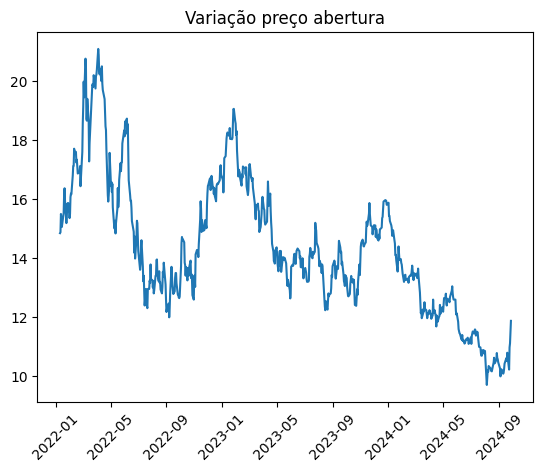

In [ ]:
plt.plot(df['Open'])
plt.title('Variação preço abertura')
plt.xticks(rotation=45)
plt.show()

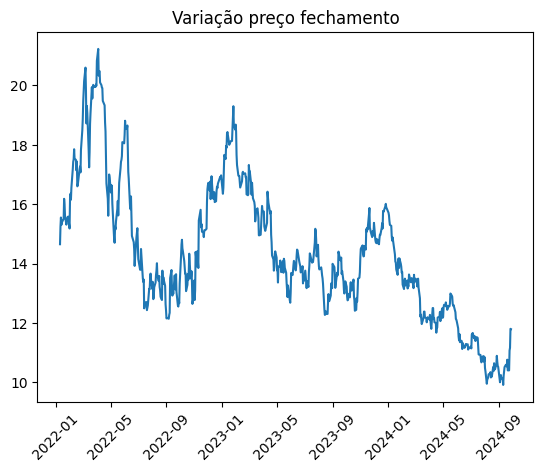

In [ ]:
plt.plot(df['Close'])
plt.title('Variação preço fechamento')
plt.xticks(rotation=45)
plt.show()

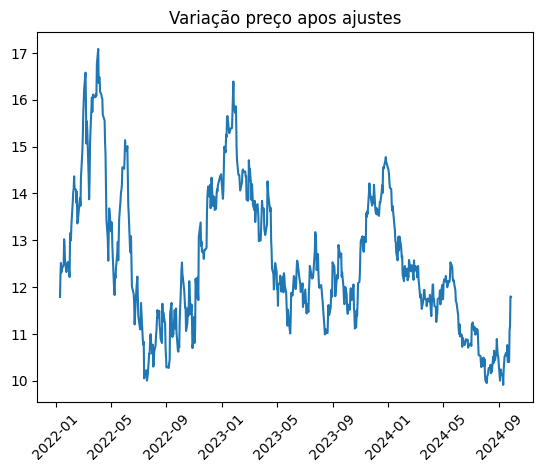

In [ ]:
plt.plot(df['Adj Close'])
plt.title('Variação preço apos ajustes')
plt.xticks(rotation=45)
plt.show()

In [ ]:
base_treino = df.iloc[:,0:6].values
normalizador = MinMaxScaler() #esse normalizador, coloca nossos dados entre 0 e 1

In [ ]:
base_treino_normalizada = normalizador.fit_transform(base_treino)
base_treino_normalizada

array([[0.26191926, 0.41872791, 0.4322409 , 0.42794371, 0.45166962,
        0.25232974],
       [0.32809987, 0.47084806, 0.46501325, 0.45430576, 0.4543058 ,
        0.30780862],
       [0.36287267, 0.49823326, 0.49601417, 0.49736374, 0.50878734,
        0.30791634],
       ...,
       [0.17424018, 0.11042403, 0.10363153, 0.12214413, 0.12390157,
        0.1949456 ],
       [0.2634512 , 0.16696117, 0.16386185, 0.1652021 , 0.16168718,
        0.64547402],
       [0.26205724, 0.16607775, 0.17537638, 0.17398948, 0.19068542,
        0.98665238]])

In [ ]:
base_treino_normalizada.shape

(683, 6)

In [ ]:
###estrutura de dados
##irei explicar passo a passo do codigo
x = [] #lista vazia para previsores
y = [] #lista vazia para previsao

for i in range(90,683): #criamos um loop para coletar dados acima de 90 dias apos a coleta
  x.append(base_treino_normalizada[i-90:i,0:6]) #o metodo append,add um elemento ao final da lista, com isso, ele vai adiconar os intervalos de i ate 90 ao final da lista x
  y.append(base_treino_normalizada[i,0])#seguindo a mesma logica explicada do append, é adicionado o valor de i ao final da lista
x,y = np.array(x), np.array(y) ##converteremos as repectivas listas para um array do numpy

In [ ]:
x[1]

array([[0.32809987, 0.47084806, 0.46501325, 0.45430576, 0.4543058 ,
        0.30780862],
       [0.36287267, 0.49823326, 0.49601417, 0.49736374, 0.50878734,
        0.30791634],
       [0.33483009, 0.47614845, 0.49069969, 0.48769769, 0.49648502,
        0.31218736],
       [0.34380358, 0.48321558, 0.48184226, 0.47188044, 0.47012305,
        0.21884556],
       [0.35838585, 0.49469969, 0.51018598, 0.50087867, 0.51142352,
        0.29239685],
       [0.43353996, 0.55388698, 0.55890159, 0.55975398, 0.5650263 ,
        0.37599959],
       [0.4122276 , 0.53710248, 0.56687326, 0.55184527, 0.58523732,
        0.35629929],
       [0.36848105, 0.50265024, 0.52878652, 0.51142348, 0.54657295,
        0.49520452],
       [0.33595166, 0.47703187, 0.47387068, 0.46309314, 0.48154653,
        0.55913389],
       [0.35502035, 0.49204946, 0.49512841, 0.47978906, 0.50351489,
        0.24178144],
       [0.36062899, 0.49646643, 0.51815765, 0.50263618, 0.53954308,
        0.38696934],
       [0.36511594, 0

In [ ]:
y[1]

0.494111923046757

In [ ]:
##para a construção do modelo, o pytorch tem como pedido que transformamos nossas listas x e y para tensores

x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

In [ ]:
#criaremos variaveis que receberão nosso dataset do torch
dataset = torch.utils.data.TensorDataset(x,y)
loader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle = True)

In [ ]:
dataset

In [ ]:
loader

In [ ]:
##criação da LSTM
class LSTM(nn.Module):
  def __init__(self):
    super().__init__()
## 6 -> 100 -> 50 -> 50 -> 1
    self.LSTM1 = nn.LSTM(input_size=6, hidden_size = 100)
    self.LSTM2 = nn.LSTM(100,50)
    self.LSTM3 = nn.LSTM(50,50, dropout=0.3, num_layers = 2)
    self.Dropout = nn.Dropout(p=0.3)
    self.Linear = nn.Linear(50,1)
    self.Sigmoid = nn.Sigmoid()

#arquiterura da rede
  def forward(self, x):


    x = x.permute(1,0,2)
    x,_ = self.LSTM1(x)
    x = self.Dropout(x)
    x,_ = self.LSTM2(x)
    x = self.Dropout(x)
    x,_ = self.LSTM3(x)
    x = x[-1]
    x = self.Dropout(x)
    x = self.Linear(x)
    x = self.Sigmoid(x)
    return x




In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [ ]:
regressor = LSTM()
criterion = nn.MSELoss()
optimizer = optim.Adam(regressor.parameters())

regressor.to(device)

LSTM(
  (LSTM1): LSTM(6, 100)
  (LSTM2): LSTM(100, 50)
  (LSTM3): LSTM(50, 50, num_layers=2, dropout=0.3)
  (Dropout): Dropout(p=0.3, inplace=False)
  (Linear): Linear(in_features=50, out_features=1, bias=True)
  (Sigmoid): Sigmoid()
)

In [ ]:
for epoch in range(100):
  running_loss = 0
  running_mae = 0

  for i, data in enumerate(loader):

    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    optimizer.zero_grad()

    outputs = regressor(inputs)
    outputs = outputs.flatten()

    loss = criterion(outputs,labels)
    loss.backward()

    optimizer.step()

    running_loss +=loss.item()

    mae =mean_absolute_error(labels.detach().cpu().numpy().flatten(),
                             outputs.detach().cpu().numpy().flatten())

    # Imprimindo os dados referentes a esse loop
    print('\rÉpoca {:3d} - Loop {:3d} de {:3d}: custo {:03.5f} - MAE {:03.5f}'.format(epoch+1, i+1, len(loader), loss, mae), end = '\r')

    # Imprimindo os dados referentes a essa época
    running_loss /= len(loader)
    running_mae /= len(loader)
    print('ÉPOCA {:3d} FINALIZADA: custo {:03.6f} - MAE {:03.6f}     '.format(epoch+1, running_loss, running_mae))



ÉPOCA   1 FINALIZADA: custo 0.002511 - MAE 0.000000     
ÉPOCA   1 FINALIZADA: custo 0.002774 - MAE 0.000000     
ÉPOCA   1 FINALIZADA: custo 0.002765 - MAE 0.000000     
ÉPOCA   1 FINALIZADA: custo 0.002812 - MAE 0.000000     
ÉPOCA   1 FINALIZADA: custo 0.003215 - MAE 0.000000     
ÉPOCA   1 FINALIZADA: custo 0.002214 - MAE 0.000000     
ÉPOCA   1 FINALIZADA: custo 0.002847 - MAE 0.000000     
ÉPOCA   1 FINALIZADA: custo 0.002137 - MAE 0.000000     
ÉPOCA   1 FINALIZADA: custo 0.003058 - MAE 0.000000     
ÉPOCA   1 FINALIZADA: custo 0.003035 - MAE 0.000000     
ÉPOCA   1 FINALIZADA: custo 0.002929 - MAE 0.000000     
ÉPOCA   1 FINALIZADA: custo 0.002255 - MAE 0.000000     
ÉPOCA   1 FINALIZADA: custo 0.002545 - MAE 0.000000     
ÉPOCA   1 FINALIZADA: custo 0.001957 - MAE 0.000000     
ÉPOCA   1 FINALIZADA: custo 0.002255 - MAE 0.000000     
ÉPOCA   1 FINALIZADA: custo 0.001777 - MAE 0.000000     
ÉPOCA   1 FINALIZADA: custo 0.001376 - MAE 0.000000     
ÉPOCA   1 FINALIZADA: custo 0.0

In [ ]:
##importação base de dados de teste
base_teste = yf.download('VALE', start='2024-10-01')

preco_real_teste = base_teste.iloc[:,1:2].values
base_completa = pd.concat([df, base_teste])

[*********************100%***********************]  1 of 1 completed


In [ ]:
base_completa.tail(5)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,VALE,VALE,VALE,VALE,VALE,VALE
Date,,,,,,
2024-10-28 00:00:00+00:00,11.01,11.01,11.040,10.94,10.97,69248500
2024-10-29 00:00:00+00:00,10.89,10.89,11.110,10.88,11.07,22045400
2024-10-30 00:00:00+00:00,10.81,10.81,10.850,10.74,10.80,31388800
2024-10-31 00:00:00+00:00,10.70,10.70,10.830,10.68,10.83,16806000
2024-11-01 00:00:00+00:00,10.72,10.72,10.775,10.70,10.73,2540285


In [ ]:
entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values
entradas = normalizador.fit_transform(entradas)

In [ ]:
entradas.shape

(114, 6)

In [ ]:
X_teste = []
for i in range(30, 92):
    X_teste.append(entradas[i-30:i, 0:7])
X_teste = np.array(X_teste)


In [ ]:
X_teste = torch.tensor(X_teste, device = device, dtype = torch.float32)

In [ ]:
regressor.eval()
previsoes = regressor(X_teste)
previsoes = previsoes.detach().cpu().numpy().reshape(-1, 1)

In [ ]:
previsoes

array([[0.50346375],
       [0.5234492 ],
       [0.47949928],
       [0.5061625 ],
       [0.47340694],
       [0.4505134 ],
       [0.48470786],
       [0.4929028 ],
       [0.48054144],
       [0.38870463],
       [0.28275976],
       [0.25412044],
       [0.25234473],
       [0.20238678],
       [0.17586426],
       [0.18346381],
       [0.24365577],
       [0.2504612 ],
       [0.1896132 ],
       [0.23761548],
       [0.14487056],
       [0.09146068],
       [0.0424028 ],
       [0.05198149],
       [0.07729879],
       [0.09349634],
       [0.1356234 ],
       [0.13983786],
       [0.1626172 ],
       [0.11675648],
       [0.13087243],
       [0.12025528],
       [0.24618101],
       [0.20200118],
       [0.30191123],
       [0.22105283],
       [0.22620532],
       [0.27597457],
       [0.37344518],
       [0.31301036],
       [0.26794812],
       [0.24342485],
       [0.12325322],
       [0.09158779],
       [0.12789375],
       [0.11172769],
       [0.12114585],
       [0.072

In [ ]:
normalizador_previsao = MinMaxScaler(feature_range = (0, 1))
normalizador_previsao.fit(base_treino[:, 0:1])

MinMaxScaler()

In [ ]:
previsoes = normalizador_previsao.inverse_transform(previsoes)

In [ ]:
previsoes

array([[13.521852 ],
       [13.665227 ],
       [13.34993  ],
       [13.541213 ],
       [13.306224 ],
       [13.141986 ],
       [13.387297 ],
       [13.446087 ],
       [13.357407 ],
       [12.698568 ],
       [11.9385195],
       [11.733061 ],
       [11.720323 ],
       [11.361923 ],
       [11.171651 ],
       [11.226171 ],
       [11.657988 ],
       [11.706809 ],
       [11.270286 ],
       [11.614655 ],
       [10.949302 ],
       [10.566139 ],
       [10.214197 ],
       [10.282915 ],
       [10.464541 ],
       [10.580743 ],
       [10.882962 ],
       [10.9131975],
       [11.076617 ],
       [10.747611 ],
       [10.848879 ],
       [10.772712 ],
       [11.676104 ],
       [11.359157 ],
       [12.075912 ],
       [11.495833 ],
       [11.532798 ],
       [11.889843 ],
       [12.589098 ],
       [12.155538 ],
       [11.832261 ],
       [11.656331 ],
       [10.794219 ],
       [10.567051 ],
       [10.82751  ],
       [10.711535 ],
       [10.779101 ],
       [10.42

In [ ]:
previsoes.mean()

11.8288555

In [ ]:
preco_real_teste.mean()

10.97166665395101

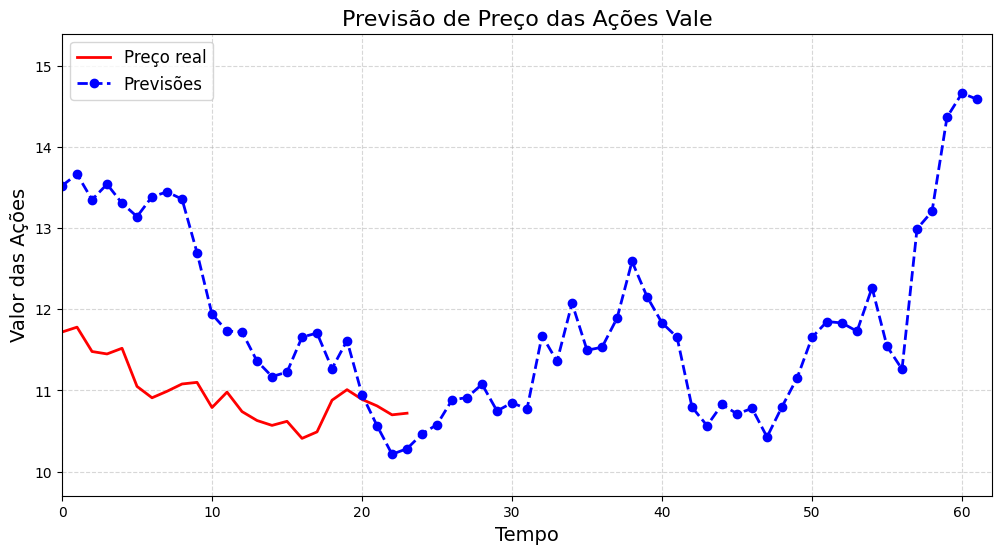

In [ ]:

plt.figure(figsize=(12, 6))

plt.plot(preco_real_teste, color='red', label='Preço real', linewidth=2, linestyle='-')
plt.plot(previsoes, color='blue', label='Previsões', linewidth=2, linestyle='--', marker='o')

# Título e rótulos dos eixos
plt.title('Previsão de Preço das Ações Vale', fontsize=16)
plt.xlabel('Tempo', fontsize=14)
plt.ylabel('Valor das Ações', fontsize=14)


plt.legend(fontsize=12, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)

plt.xlim([0, max(len(preco_real_teste), len(previsoes))])
plt.ylim([min(min(preco_real_teste), min(previsoes)) * 0.95, max(max(preco_real_teste), max(previsoes)) * 1.05])

# Exibir o gráfico
plt.show()
